<a href="https://colab.research.google.com/github/nogood1014/2020-2-AI/blob/main/05_mnist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준ㅂ;
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 훈련에 사용할 옵티마이저와 손실 함수, 출력 정보를 선택
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 모델 요약 표시
model.summary()
#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)
# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1462 

[0.09029663354158401, 0.9711999893188477]

In [ ]:
# 테스트 데이터의 첫 번째 손글씨 예측 결과를 확인
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[5.54075985e-09 4.34150005e-09 3.04055834e-06 2.24949763e-04
  1.06533296e-10 6.05535263e-07 6.68315687e-15 9.99752939e-01
  2.91390847e-07 1.81946489e-05]]
[5.54075985e-09 4.34150005e-09 3.04055834e-06 2.24949763e-04
 1.06533296e-10 6.05535263e-07 6.68315687e-15 9.99752939e-01
 2.91390847e-07 1.81946489e-05]


In [ ]:
import numpy as np

# 10개의 수를 더하면?
one_pred = pred_result[0]
print(one_pred.sum())

#혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

1.0
7


In [ ]:
import numpy as np

# 10개의 수를 더하면?
one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

#혹시 가장 큰 수가 있는 첨자가 결과
print(tf.argmax(one_pred).numpy())

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


In [ ]:
import numpy as np

print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [ ]:
import numpy as np 

# 원 핫 인코딩과 argmax학습
print(tf.argmax([5, 4, 10, 1, 2]))
print(tf.argmax([3, 1, 4, 9, 6, 7, 2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))


tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


1.0
7


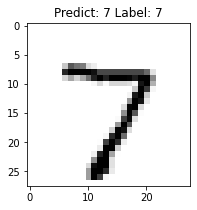

In [ ]:
import numpy as np

# 10개의 수를 더하면?
one_pred = pred_result[0]
print(one_pred.sum())

#혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
tmp = "Predict: " + str(one) + " Label: " + str(y_test[0])
plt.title(tmp)
_ =plt.imshow(x_test[0], cmap="Greys")



In [ ]:
 import numpy as np
 
 data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
 print(data)
 np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [ ]:
import tensorflow as tf

tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3, input_shape=(2, ))
outputs = layer(data, training=True)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [ ]:
from random import sample
import numpy as np

# x_test로 직접 결과 처리
pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

# 원핫 인코딩을 일반 데이터로 변환
pred_labels = np.argmax(pred_result, axis=1)
# 예측한 답 출력
print(pred_labels)
# 실제 정답 출력
print(y_test)

(10000, 10)
[2.06433040e-08 7.43327320e-08 1.09673265e-05 4.36635542e-04
 2.40519896e-11 6.51216547e-09 5.06972611e-13 9.99548376e-01
 1.28066560e-07 3.83306724e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


임이의 20개 예측 값과 정답 그리기


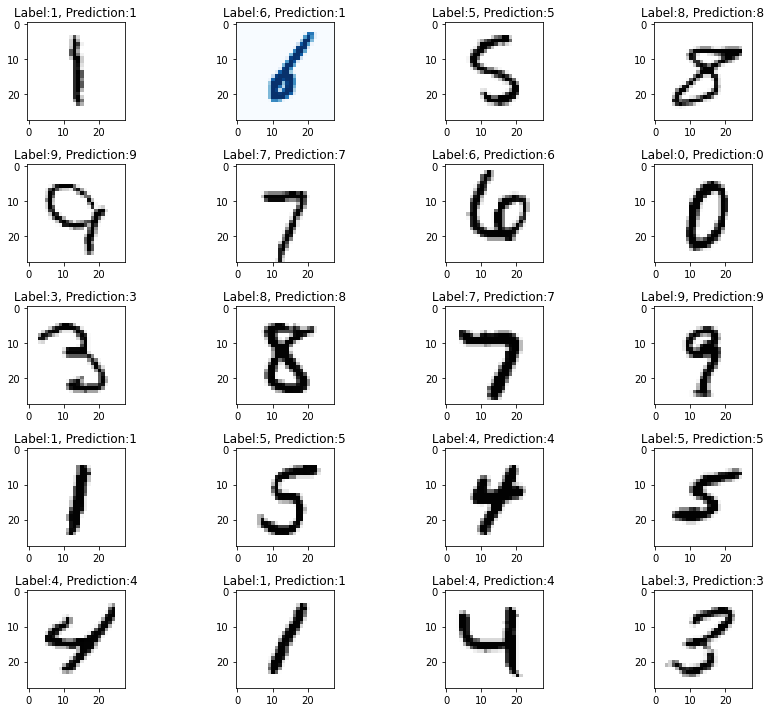

In [ ]:
from random import sample
import numpy as np

# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

# 랜덤하게 20개의 훈련용 자료를 예측 값과 정답, 그림을 그려보자
nrows, ncols = 5, 4     # 출력 가로 세로 수
samples = sorted(sample(range(len(x_test)), nrows * ncols))   # 출력할 첨자 선정

# 임의의 20개 그리기
count = 0
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    # 예측이 틀린 것은 파란색으로 그리기
    cmap = 'Greys' if (pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
예측이 잘못된 20개 샘플로 그리기

정답이 틀린 수 237
[924, 9024, 2118, 610, 810, 5955, 115, 1717, 9642, 3838, 6166, 2713, 1247, 1952, 1609, 8094, 1670, 6030, 3384, 4224]


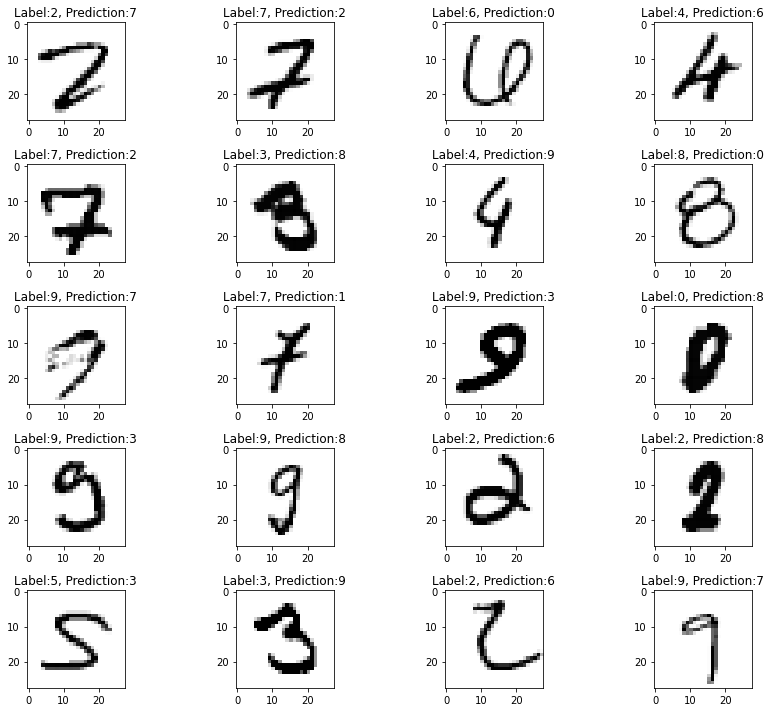

In [ ]:
from random import sample
import numpy as np

# 예측이 틀린 것 첨자를 저장할 리스트
mispred = []
# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
  if pred_labels[n] != y_test[n]:       # 예측이 틀린 조건
    mispred.append(n)
print('정답이 틀린 수', len(mispred))

#랜덤하게 틀린 것 20개의 첨자 리스트 생성
samples = sample(mispred, 20)
print(samples)

count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12, 10))
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap="Greys", interpolation='nearest')
  tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()

중간층을 늘리고 훈련 횟수를 증가 (중간!)

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

#훈련에 사용할 옵티마이저와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#모델 요약 표시
model.summary()
#모델을 훈련 데이터로 총 20번 훈련
model.fit(x_train, y_train, epochs=20)
#모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

[0.08361346274614334, 0.9800000190734863]

reshape()로 평탄화 작업을 수행 후 Dense() 층 사용

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 평탄화 작업 수행
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
   # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

#모델 요약 표시
model.summary()

#훈련에 사용할 옵티마이저와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=20)
#모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.9131
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1458 - accuracy: 0.9565
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9672
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - lo